In [1]:
# prompt: connect to drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [4]:
# Read the CSV file into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/Bengkel Koding/ObesityDataSet.csv')

In [7]:
# Menampilkan 5 baris pertama pada data frame
print('Baris 5 pertama:')
print(df.head().to_markdown(index=False, numalign="left", stralign="left"))

# Menampilkan informasi umum dataset
print('\nInformasi umum dataset:')
df.info()

# Menampilkan deskripsi data dan tipe
print('\nDeskripsi:')
print(df.describe(include='all').to_markdown(numalign="left", stralign="left"))

Baris 5 pertama:
| Age   | Gender   | Height   | Weight   | CALC       | FAVC   | FCVC   | NCP   | SCC   | SMOKE   | CH2O   | family_history_with_overweight   | FAF   | TUE   | CAEC      | MTRANS                | NObeyesdad          |
|:------|:---------|:---------|:---------|:-----------|:-------|:-------|:------|:------|:--------|:-------|:---------------------------------|:------|:------|:----------|:----------------------|:--------------------|
| 21    | Female   | 1.62     | 64       | no         | no     | 2      | 3     | no    | no      | 2      | yes                              | 0     | 1     | Sometimes | Public_Transportation | Normal_Weight       |
| 21    | Female   | 1.52     | 56       | Sometimes  | no     | 3      | 3     | yes   | yes     | 3      | yes                              | 3     | 0     | Sometimes | Public_Transportation | Normal_Weight       |
| 23    | Male     | 1.8      | 77       | Frequently | no     | 2      | 3     | no    | no      | 2      | ye

In [8]:
# Cek keberadaan missing value
print('\nmissing values tiap kolom:')
print(df.isnull().sum().to_markdown(numalign="left", stralign="left"))

# Cek data duplikat
print('\nNumber of duplicate rows:')
print(df.duplicated().sum())

# Cek unique value
print('\nUnique values in each column:')
for col in df.columns:
    if df[col].nunique() < 20: # Display unique values only for columns with less than 20 unique values
        print(f"Column '{col}': {df[col].unique()}")


missing values tiap kolom:
|                                | 0   |
|:-------------------------------|:----|
| Age                            | 14  |
| Gender                         | 9   |
| Height                         | 12  |
| Weight                         | 11  |
| CALC                           | 5   |
| FAVC                           | 11  |
| FCVC                           | 8   |
| NCP                            | 12  |
| SCC                            | 10  |
| SMOKE                          | 5   |
| CH2O                           | 6   |
| family_history_with_overweight | 13  |
| FAF                            | 8   |
| TUE                            | 9   |
| CAEC                           | 11  |
| MTRANS                         | 6   |
| NObeyesdad                     | 0   |

Number of duplicate rows:
18

Unique values in each column:
Column 'Gender': ['Female' 'Male' '?' nan]
Column 'CALC': ['no' 'Sometimes' 'Frequently' '?' 'Always' nan]
Column 'FAVC': ['no' 'yes

Kesimpulan :
- Seluruh tipe data adalah objek
- Terdapat banyak missing value tiap kolom
- Terdapat 18 data duplikat


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Replace '?' with NaN
df = df.replace('?', np.nan)

In [12]:
# Convert numerical columns to numeric type
numerical_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
for col in numerical_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [14]:
# Menampilkan data update setelah dibersihkan
print('\nGeneral information about the DataFrame after cleaning and type conversion:')
df.info()

# Menampilkan missing value setelah mengganti "?"
print('\nMissing values after "?" replacement and type conversion:')
print(df.isnull().sum().to_markdown(numalign="left", stralign="left"))


General information about the DataFrame after cleaning and type conversion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2089 non-null   float64
 1   Gender                          2089 non-null   object 
 2   Height                          2089 non-null   float64
 3   Weight                          2092 non-null   float64
 4   CALC                            2091 non-null   object 
 5   FAVC                            2089 non-null   object 
 6   FCVC                            2093 non-null   float64
 7   NCP                             2089 non-null   float64
 8   SCC                             2093 non-null   object 
 9   SMOKE                           2098 non-null   object 
 10  CH2O                            2096 non-null   float64
 11  family_history_wit

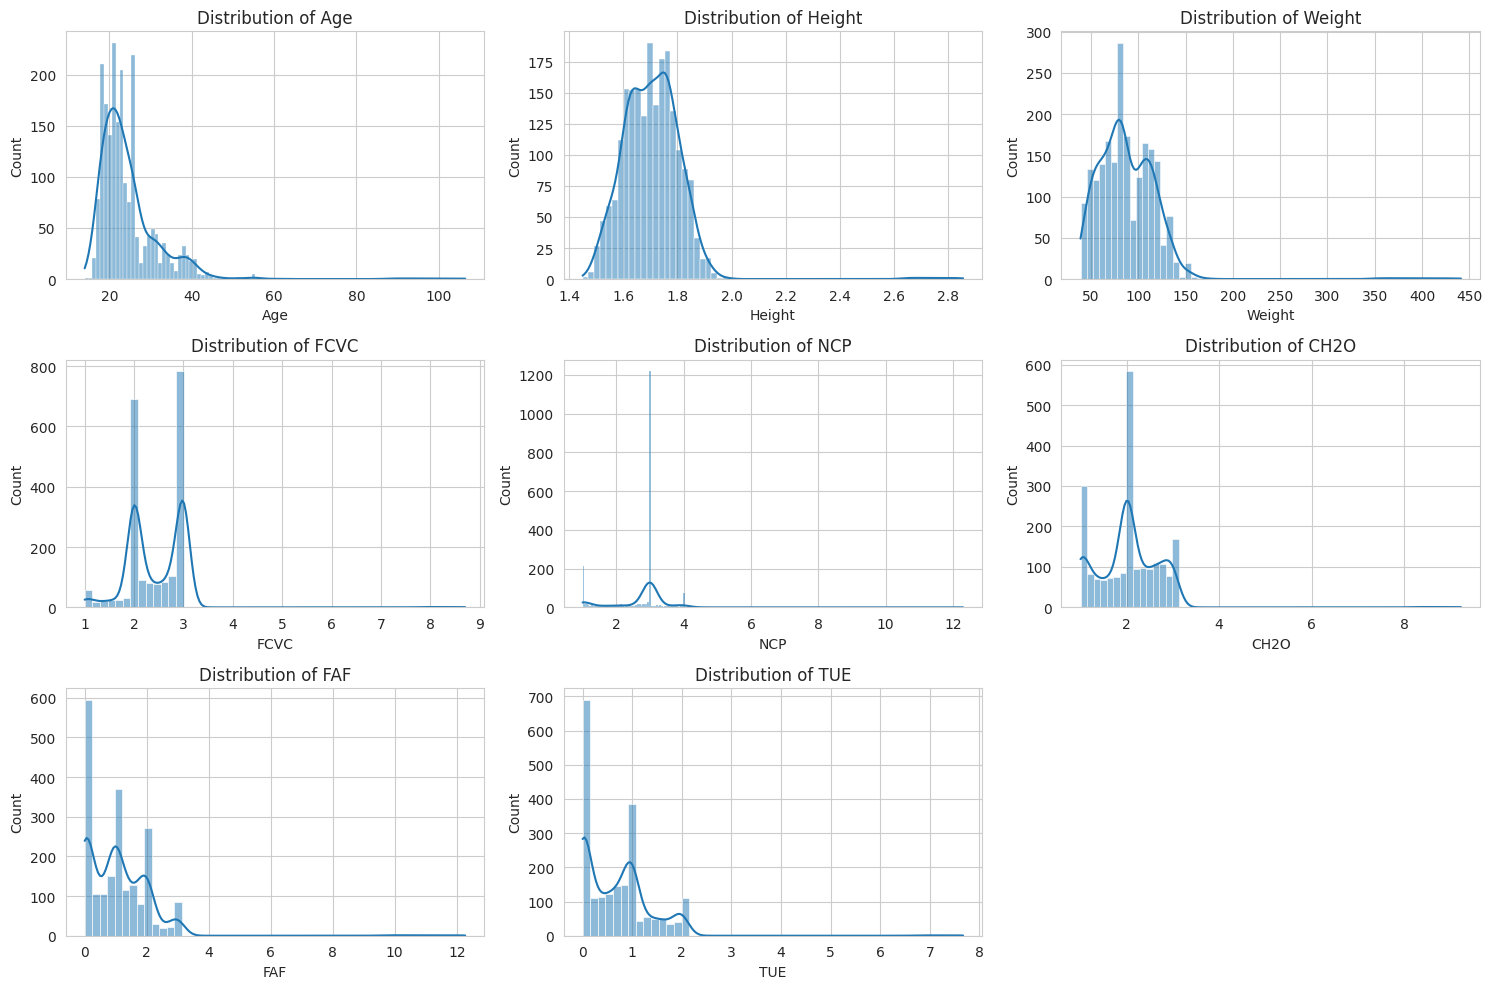

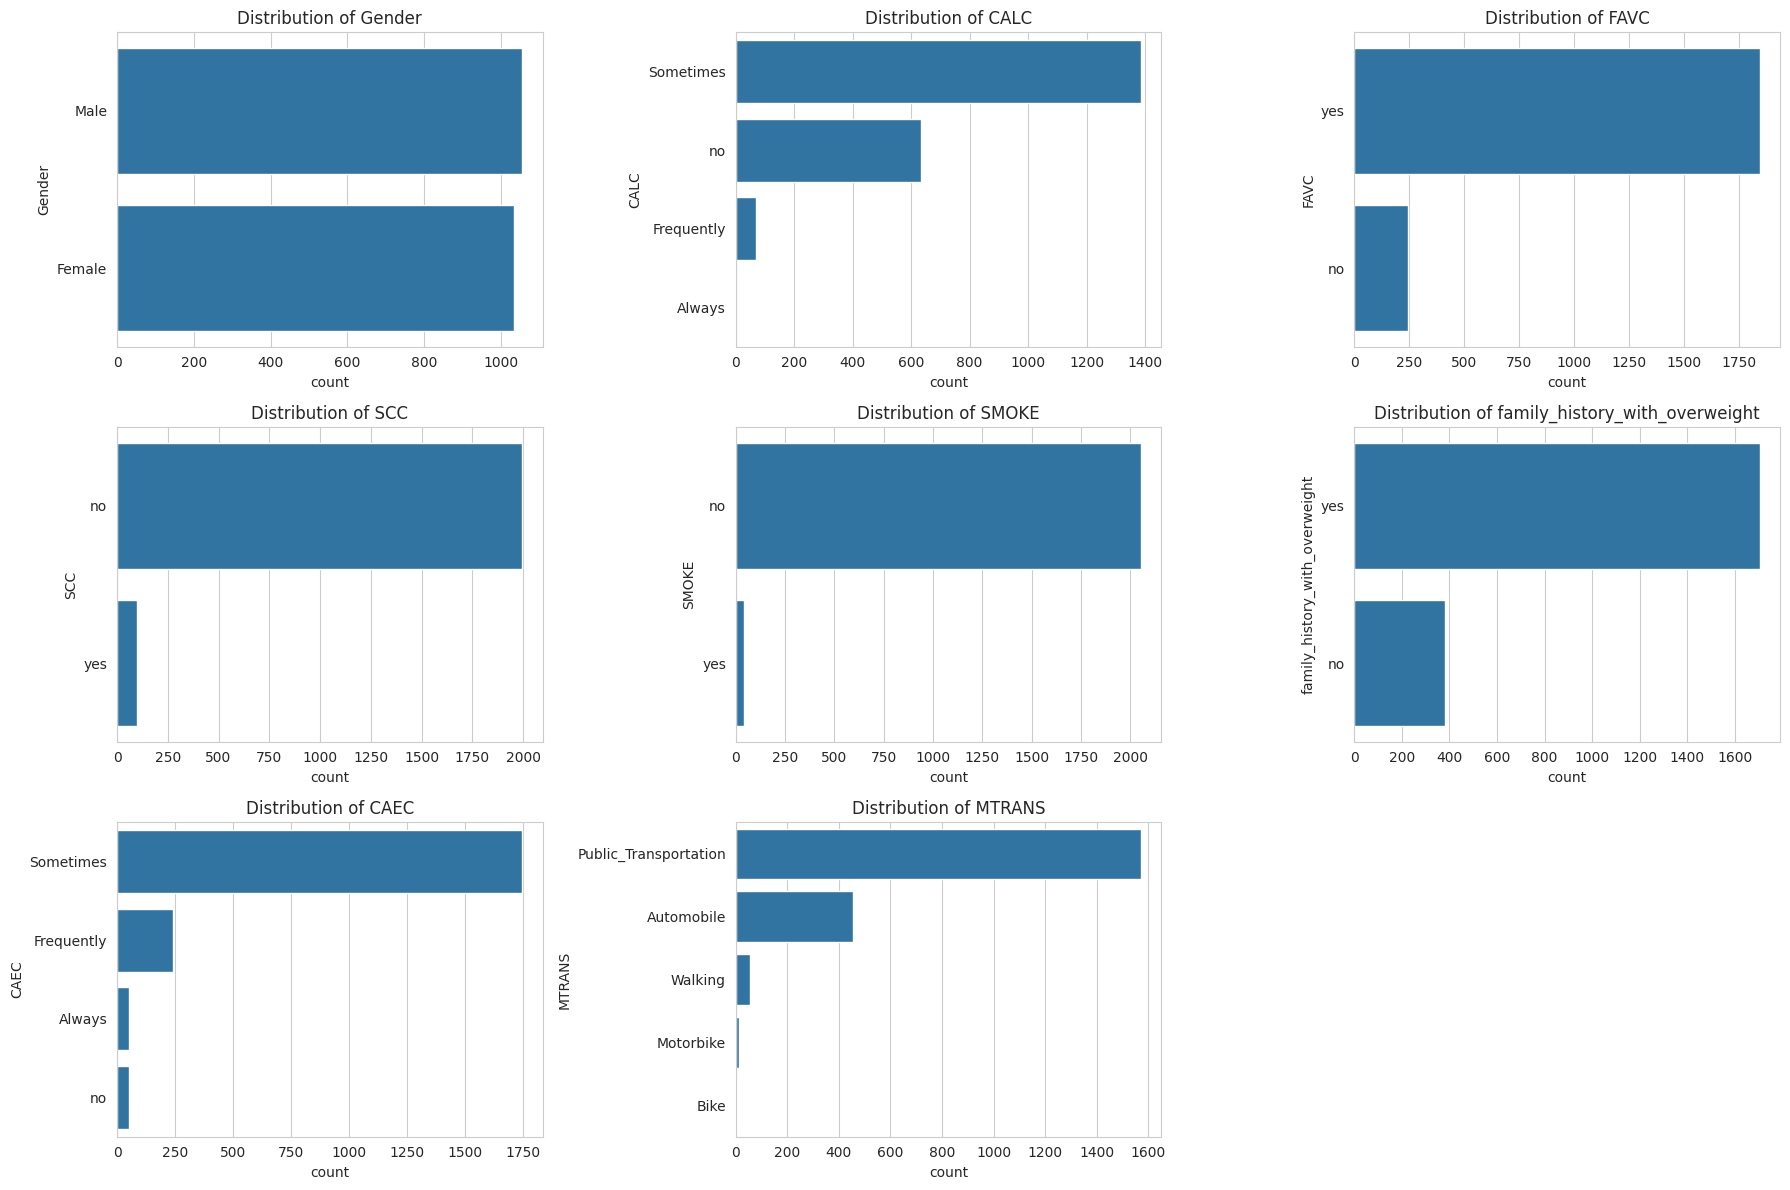

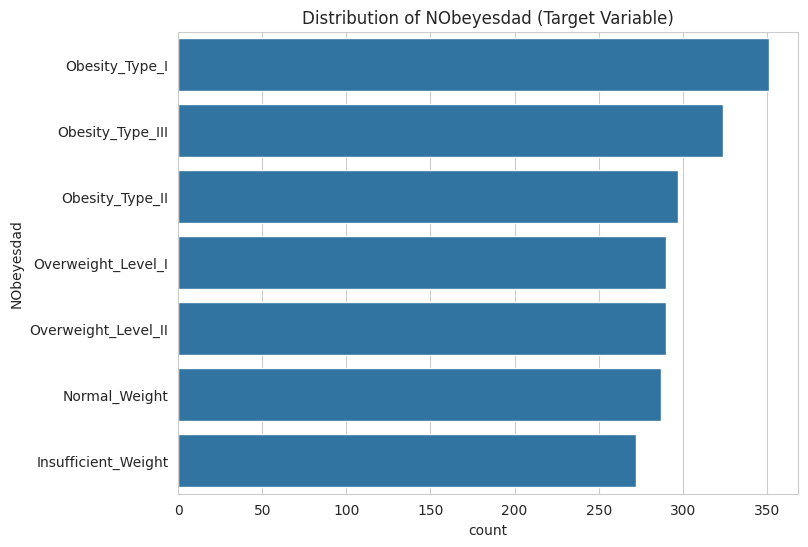

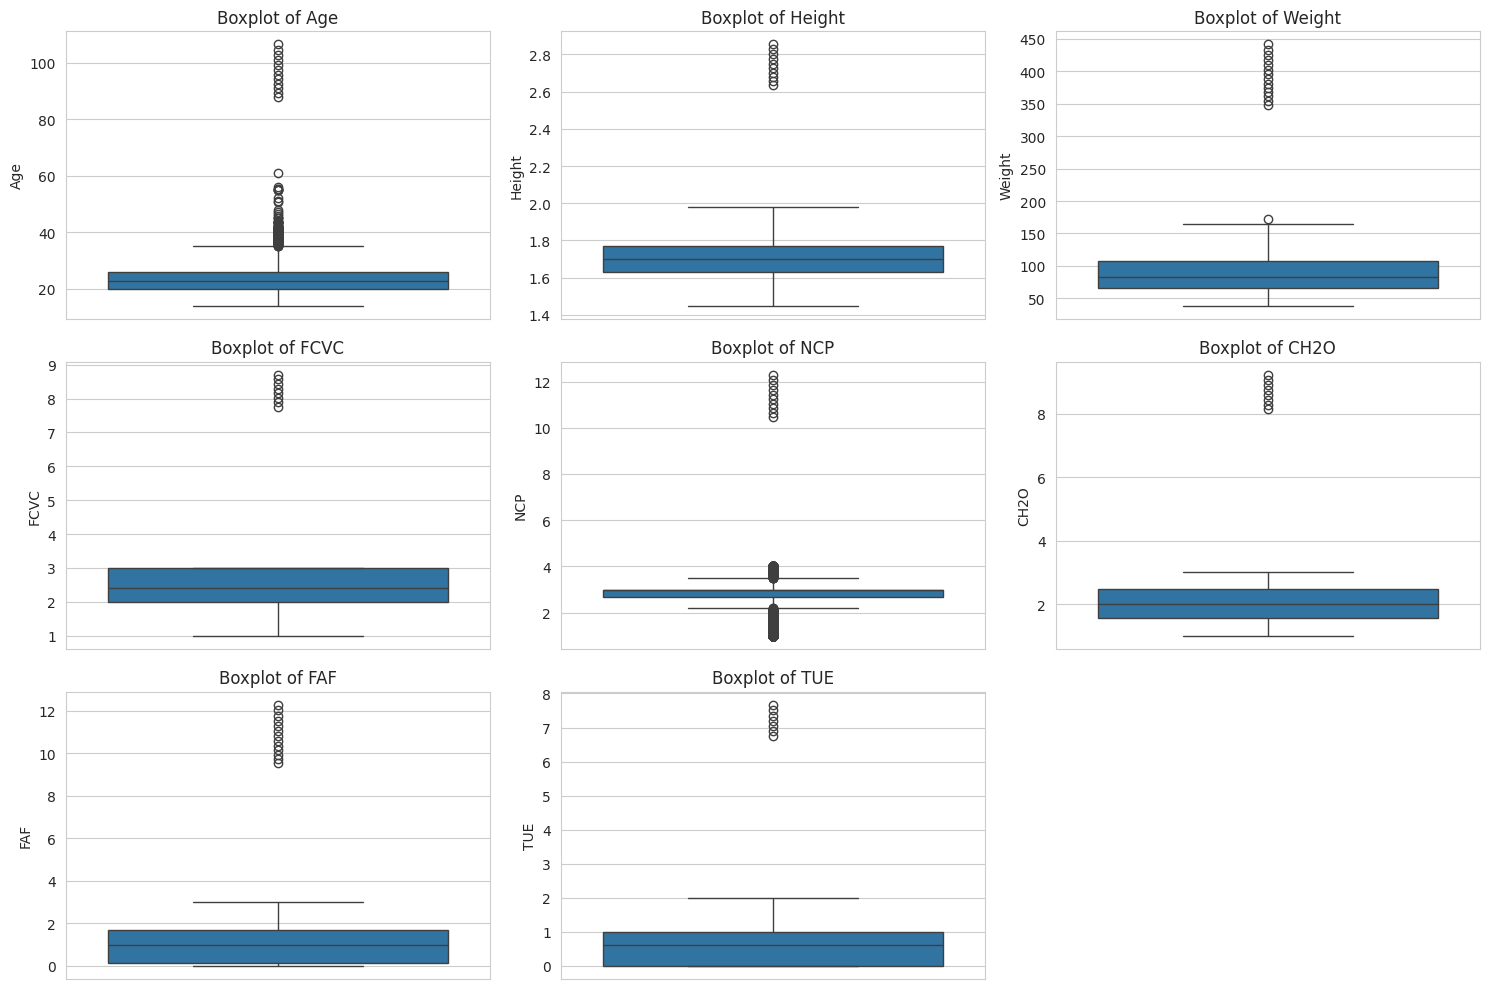

In [15]:
# Visualizations

# Set plot style
sns.set_style("whitegrid")

# Histograms for numerical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Count plots for categorical features
categorical_cols = df.select_dtypes(include='object').columns.tolist()
# Exclude the target variable for now, as it will be plotted separately for balance check
if 'NObeyesdad' in categorical_cols:
    categorical_cols.remove('NObeyesdad')

plt.figure(figsize=(18, 12))
for i, col in enumerate(categorical_cols):
    plt.subplot(3, 3, i + 1)
    sns.countplot(data=df, y=col, order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Distribution of the target variable NObeyesdad (class balance check)
plt.figure(figsize=(8, 6))
sns.countplot(data=df, y='NObeyesdad', order=df['NObeyesdad'].value_counts().index)
plt.title('Distribution of NObeyesdad (Target Variable)')
plt.show()

# Boxplots for outlier detection in numerical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

Kesimpulan :
- data telah bersih, siap untuk pemodelan
- fitur kategorikal telah diubah menjadi numerik